In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [2]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
# https://seaborn.pydata.org/
# "Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics."
import seaborn as sns
# switch to seaborn figure aesthetic defaults
#sns.set_theme()
sns.set()


# Computational Mathematics  <a class="tocSkip">
    
## Probability (and some first steps towards Machine Learning) <a class="tocSkip">

## Learning objectives  <a class="tocSkip">
   
   
1. Revision of some introductory statistics concepts.


2. Revision of some basic probability and uncertainty concepts.


3. Introduction of some initial machine learning concepts.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistics</a></span><ul class="toc-item"><li><span><a href="#Mean,-variance,-standard-deviation,-and-z-score" data-toc-modified-id="Mean,-variance,-standard-deviation,-and-z-score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean, variance, standard deviation, and z-score</a></span><ul class="toc-item"><li><span><a href="#Mean-(average)" data-toc-modified-id="Mean-(average)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Mean (average)</a></span></li><li><span><a href="#Variance" data-toc-modified-id="Variance-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Variance</a></span></li><li><span><a href="#Standard-deviation" data-toc-modified-id="Standard-deviation-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Standard deviation</a></span></li><li><span><a href="#Standard-score-(z-score)" data-toc-modified-id="Standard-score-(z-score)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Standard score (z-score)</a></span></li></ul></li><li><span><a href="#The-Iris-dataset" data-toc-modified-id="The-Iris-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The Iris dataset</a></span></li><li><span><a href="#Covariance-and-correlation-coefficient" data-toc-modified-id="Covariance-and-correlation-coefficient-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Covariance and correlation coefficient</a></span><ul class="toc-item"><li><span><a href="#Covariance" data-toc-modified-id="Covariance-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Covariance</a></span></li><li><span><a href="#Covariance-Matrix" data-toc-modified-id="Covariance-Matrix-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Covariance Matrix</a></span></li><li><span><a href="#Correlation-coefficient" data-toc-modified-id="Correlation-coefficient-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Correlation coefficient</a></span></li></ul></li></ul></li><li><span><a href="#Probability-and-uncertainty" data-toc-modified-id="Probability-and-uncertainty-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Probability and uncertainty</a></span><ul class="toc-item"><li><span><a href="#Random-variables" data-toc-modified-id="Random-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Random variables</a></span><ul class="toc-item"><li><span><a href="#More-definitions" data-toc-modified-id="More-definitions-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>More definitions</a></span></li><li><span><a href="#Discrete-and-continuous-random-variables" data-toc-modified-id="Discrete-and-continuous-random-variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Discrete and continuous random variables</a></span></li></ul></li><li><span><a href="#Probability" data-toc-modified-id="Probability-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Probability</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Notation" data-toc-modified-id="Notation-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Notation</a></span></li></ul></li><li><span><a href="#Probability-distribution-function" data-toc-modified-id="Probability-distribution-function-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Probability distribution function</a></span><ul class="toc-item"><li><span><a href="#Probability-Mass-Functions" data-toc-modified-id="Probability-Mass-Functions-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Probability Mass Functions</a></span></li><li><span><a href="#Properties-of-Probability-Mass-Functions" data-toc-modified-id="Properties-of-Probability-Mass-Functions-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Properties of Probability Mass Functions</a></span></li><li><span><a href="#Simulation-of-a-die-rolling-experiment" data-toc-modified-id="Simulation-of-a-die-rolling-experiment-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Simulation of a die-rolling experiment</a></span></li><li><span><a href="#Probability-Density-Functions" data-toc-modified-id="Probability-Density-Functions-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Probability Density Functions</a></span></li><li><span><a href="#Example-1" data-toc-modified-id="Example-1-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Cumulative-distribution-function" data-toc-modified-id="Cumulative-distribution-function-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Cumulative distribution function</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Example 2</a></span></li></ul></li><li><span><a href="#Monte-Carlo-methods" data-toc-modified-id="Monte-Carlo-methods-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Monte Carlo methods</a></span><ul class="toc-item"><li><span><a href="#Example---Estimating-that-value-of-$\pi$-using-a-Monte-Carlo-method" data-toc-modified-id="Example---Estimating-that-value-of-$\pi$-using-a-Monte-Carlo-method-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Example - Estimating that value of $\pi$ using a Monte Carlo method</a></span></li></ul></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Central Limit Theorem</a></span></li><li><span><a href="#Joint-Probability" data-toc-modified-id="Joint-Probability-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Joint Probability</a></span><ul class="toc-item"><li><span><a href="#Notation" data-toc-modified-id="Notation-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Notation</a></span></li><li><span><a href="#Dependent-and-Independent-Events" data-toc-modified-id="Dependent-and-Independent-Events-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Dependent and Independent Events</a></span></li><li><span><a href="#Joint-Probability-of-Independent-and-Dependent-Events" data-toc-modified-id="Joint-Probability-of-Independent-and-Dependent-Events-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Joint Probability of Independent and Dependent Events</a></span></li><li><span><a href="#Marginal-Probabilities-and-the-sum-rule" data-toc-modified-id="Marginal-Probabilities-and-the-sum-rule-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>Marginal Probabilities and the sum rule</a></span></li><li><span><a href="#The-Iris-dataset-revisited" data-toc-modified-id="The-Iris-dataset-revisited-3.6.5"><span class="toc-item-num">3.6.5&nbsp;&nbsp;</span>The Iris dataset revisited</a></span></li></ul></li><li><span><a href="#Conditional-Probability" data-toc-modified-id="Conditional-Probability-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Conditional Probability</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#The-Product-Rule-of-probability" data-toc-modified-id="The-Product-Rule-of-probability-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>The Product Rule of probability</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3.7.3"><span class="toc-item-num">3.7.3&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#More-Events" data-toc-modified-id="More-Events-3.7.4"><span class="toc-item-num">3.7.4&nbsp;&nbsp;</span>More Events</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Some-definitions" data-toc-modified-id="Some-definitions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Some definitions</a></span></li><li><span><a href="#Supervised-learning" data-toc-modified-id="Supervised-learning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Supervised learning</a></span></li><li><span><a href="#Bayes'-Theorem" data-toc-modified-id="Bayes'-Theorem-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bayes' Theorem</a></span></li><li><span><a href="#Naive-Bayes-classifier" data-toc-modified-id="Naive-Bayes-classifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Naive Bayes classifier</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li><li><span><a href="#Likelihood-[$\star$]" data-toc-modified-id="Likelihood-[$\star$]-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Likelihood [$\star$]</a></span><ul class="toc-item"><li><span><a href="#The-(negative)-log-likelihood--[$\star$]" data-toc-modified-id="The-(negative)-log-likelihood--[$\star$]-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>The (negative) log likelihood  [$\star$]</a></span></li></ul></li><li><span><a href="#Maximum-likelihood-estimation--[$\star$]" data-toc-modified-id="Maximum-likelihood-estimation--[$\star$]-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Maximum likelihood estimation  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Example-[$\star$]" data-toc-modified-id="Example-[$\star$]-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Example [$\star$]</a></span></li></ul></li><li><span><a href="#Maximum-a-posteriori-estimation-[$\star$]" data-toc-modified-id="Maximum-a-posteriori-estimation-[$\star$]-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Maximum a posteriori estimation [$\star$]</a></span></li><li><span><a href="#Linear-regression-[$\star$]" data-toc-modified-id="Linear-regression-[$\star$]-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Linear regression [$\star$]</a></span></li><li><span><a href="#Maximum-likelihood-estimation-for-linear-regression-[$\star\star$]" data-toc-modified-id="Maximum-likelihood-estimation-for-linear-regression-[$\star\star$]-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Maximum likelihood estimation for linear regression [$\star\star$]</a></span></li><li><span><a href="#Linear-regression-on-the-Iris-dataset-[$\star$]" data-toc-modified-id="Linear-regression-on-the-Iris-dataset-[$\star$]-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Linear regression on the Iris dataset [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4.10.1"><span class="toc-item-num">4.10.1&nbsp;&nbsp;</span>Exercise</a></span></li></ul></li><li><span><a href="#Logistic-regression-[$\star$]" data-toc-modified-id="Logistic-regression-[$\star$]-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Logistic regression [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-functions-...-the-logistic-function-[$\star$]" data-toc-modified-id="Sigmoid-functions-...-the-logistic-function-[$\star$]-4.11.1"><span class="toc-item-num">4.11.1&nbsp;&nbsp;</span>Sigmoid functions ... the logistic function [$\star$]</a></span></li><li><span><a href="#Classification-using-the-logistic-function-and-linear-regression-[$\star$]" data-toc-modified-id="Classification-using-the-logistic-function-and-linear-regression-[$\star$]-4.11.2"><span class="toc-item-num">4.11.2&nbsp;&nbsp;</span>Classification using the logistic function and linear regression [$\star$]</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introduction

Data science (and machine learning) tries to find patterns and extract knowledge from data. 

It is a common practice in science to use observations to understand systems. 
We do that by building a mathematical model to represent the system using mathematical concepts. 

We've seen and discussed these concept several times already.
We also noted the famous saying which we should always keep in mind


<br>


> "All models are wrong, some are useful" - George Box


<br>

The goal of probability is to deal with uncertainty. 

To make sense of data, we have to deal with uncertainty. 
There are multiple possible sources of uncertainty. 
It can come from the data itself, from the data that you do not have, from the inherent stochasticity (or randomness) of the system you want to model, from simplifying assumptions made in your model, etc.

# Statistics

First let's review some concepts from introductory statistics.

## Mean, variance, standard deviation, and z-score

Let us say we have a set of values (*dataset*) 

$$x_1, x_2, \ldots, x_n$$ 

we obtained by measuring/observing a property of the system we want to understand. 

For instance, $x_i$ could be the prices of houses in central London, or systolic blood pressure readings of patients in the clinical trial studying the effectiveness of a new medicine. 

We can write our one-dimensional dataset as a vector 

$$\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$$ 


The size of the dataset $n$ can range from only a few to many billions. 

Looking at the values one by one trying to find the pattern in our data would most probably not lead us to the understanding of system. Here, we look at the first few statistical values we can extract from our dataset to help us understand the system.

### Mean (average)

The *mean* of a vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$, usually denoted as $\bar{x}$, is the arithmetic mean (or average) of its elements, i.e. the sum of its components $x_i$ divided by the number of components $n$. 

Mathematically, it can be expressed as:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

We interpret the mean as the middle (or the central point) of our dataset around which all values are equally distributed.

<br>

Note: There are other "mean"s such as the *harmonic mean*, the *geometric mean* etc., but when we use *mean* with no qualifiers, we are referring to the *arithmetic mean* as above. 

Together these are termed the three classical [*Pythagorean means*](https://en.wikipedia.org/wiki/Pythagorean_means).

<br>

NB. The *median* and the *mode* are other examples of [*averages*](https://en.wikipedia.org/wiki/Average).

In [3]:
# datasets
x = np.array([-15, 1, 9, 25])
y = np.array([3, 4, 6, 7])

# (arithmetic) means of these two datasets
print(f'mean(x) = {np.mean(x)}')
print(f'mean(y) = {np.mean(y)}')

mean(x) = 5.0
mean(y) = 5.0


### Variance

The [*variance*](https://en.wikipedia.org/wiki/Variance), or to be precise, the *population variance*, is a value describing how the data is spread around the centre of our data (mean). 

A dataset with a large variance means that the data points are spread far away from the mean. 

On the other hand, a dataset with a small variance means that the data points are grouped closely around the mean. 

<br>

For example, datasets: $\mathbf{x} = [-15, 1, 9, 25]^T$ and $\mathbf{y} = [3, 4, 6, 7]^T$ have the same mean $\bar{x} = \bar{y} = 5$, but data points in $\mathbf{x}$ are further away from the mean than the data points in $\mathbf{x}$ - we say that dataset $\mathbf{x}$ has higher variance than dataset $\mathbf{y}$. 

<br>

For each data point in our dataset, we can compute the distance from the mean $(x_i - \bar{x})$. 

Now, if we take the average of the squared distances from the mean, we obtain the *variance* $\mathrm{Var}(\mathbf{x})$ of our dataset $\mathbf{x}$:

$$
\mathrm{Var}(\mathbf{x}) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
$$

<br>

For discussions of why we take the square  of the differences see <https://stats.stackexchange.com/questions/118/why-square-the-difference-instead-of-taking-the-absolute-value-in-standard-devia> and <https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8527.2005.00304.x>

In [4]:
# datasets
x = np.array([-15, 1, 9, 25])
y = np.array([3, 4, 6, 7])

# Variances
print(f'Var(x) = {np.var(x)}')
print(f'Var(y) = {np.var(y)}')

Var(x) = 208.0
Var(y) = 2.5


### Standard deviation

The *standard deviation* (or population SD) is simply the square root of the variance. It is usually denoted as $\sigma$:

$$
\sigma(x) = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}
$$

Both the variance and the standard deviation are *dispersion indicators*: they quantify how the values in a dataset are dispersed around the mean. 

Note that the units of variance is the square of the units of the observations, whereas the standard deviation has the same units. 

Both the variance and the standard deviation are always positive (like a distance, measuring how far away the data points are from the mean):

$$
\mathrm{Var}(x) \geq 0, \quad \sigma(x) \geq 0
$$

In [5]:
# datasets
x = np.array([-15, 1, 9, 25])
y = np.array([3, 4, 6, 7])

# standard deviations
print(f'stddev(x) = {np.std(x)}')
print(f'stddev(y) = {np.std(y)}')

stddev(x) = 14.422205101855956
stddev(y) = 1.5811388300841898


#### Population vs sample mean/variance/standard deviation

In statistics, it is important to differentiate between the population and a sample. 

The *population* is the exhaustive set of all members of a specified group. e.g. if we are interested in working with house prices in London, the set of every single house in London is the population. 

The above discussion about variance/SD is about *population variance*. The formula is only valid when the dataset consists of the entire population. 

Getting data for the entire population is often difficult, if not impossible. 
More commonly, we work with a *sample* from a large population, which is a subset of the whole population. 

In this case, we are interested in using the data from the *sample* to estimate the mean/variance of the *population*. 

<br>

The mean of a sample represents a good estimate for the mean of the population. 
In other words, the sample mean is an [*unbiased estimator*](https://en.wikipedia.org/wiki/Bias_of_an_estimator) of the population mean. 

However, the variance (and standard deviation as below) of a sample is consistently less than the variance of the population the sample is from. 
In other words, the sample variance is a [*biased estimator*](https://en.wikipedia.org/wiki/Bias_of_an_estimator) of the population variance. 

Hence, we must make a distinction between calculating the population variance directly and using the sample variance to *estimate* population variance. 

<br>

[NB. In case of the latter, we can apply a [correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). This discussion also applies to standard deviation and covariance.] 


### Standard score (z-score)

By knowing how to compute the mean ($\bar{x}$) and the standard deviation ($\sigma$), we can now define the [*standard score*](https://en.wikipedia.org/wiki/Standard_score), commonly referred to as the z-score. 

We can compute the difference between a single value $x_i$ in the dataset $\mathbf{x}$ and the mean as $(x_i - \bar{x})$. 

If we divide this difference by the standard deviation we get the standard score (z-score):

$$z_{i} = \frac{x_i - \bar{x}}{\sigma}$$

The z-score has no units (is dimensionless as we've divided two quantities that have the same units) and quantifies how many standard deviations a data point is away from the mean. 

Let's compute z-scores for data points in $\mathbf{x}$ from the previous example:

In [6]:
print(f'z-scores: {dict(zip(x, scipy.stats.zscore(x)))}')

z-scores: {-15: -1.386750490563073, 1: -0.2773500981126146, 9: 0.2773500981126146, 25: 1.386750490563073}


## The Iris dataset

The famous [**Iris dataset**](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a multivariate dataset consisting of 50 samples from the three species of the Iris flower (*Iris setosa*, *Iris virginica*, *Iris versicolor*). 

Four features were measured in each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a model to distinguish the species from each other.

This data set remained a popular reference data set for classification for many decades following its introduction - to the point that [scikit-learn](https://scikit-learn.org/) (a Python package with implementations of many common machine learning algorithms) includes it out-of-the-box.

However, it is considered *too simple* for today's state-of-the-art deep learning algorithms and hence not really used outside of the classroom anymore. 

Let's try loading the Iris dataset.

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

We can now have a look at the description of the Iris dataset:

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The "data" consists of 150 rows and 4 columns:

In [9]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The four columns are measurements (in cm) of the following features:

In [10]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Each data row corresponds to one of the three species of Iris. 

The identifiers (0, 1, or 2) encode to which Iris species (or **class**) each row belongs to:

In [11]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


and identifiers 0, 1 and 2 above correspond to the following Iris species:

In [12]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


Let's load the Iris dataset into a `pandas` DataFrame:

In [13]:
irisdf = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Let's examine the Iris dataset visually using pairwise scatter plots from the seaborn plotting library:

<https://seaborn.pydata.org/generated/seaborn.pairplot.html>

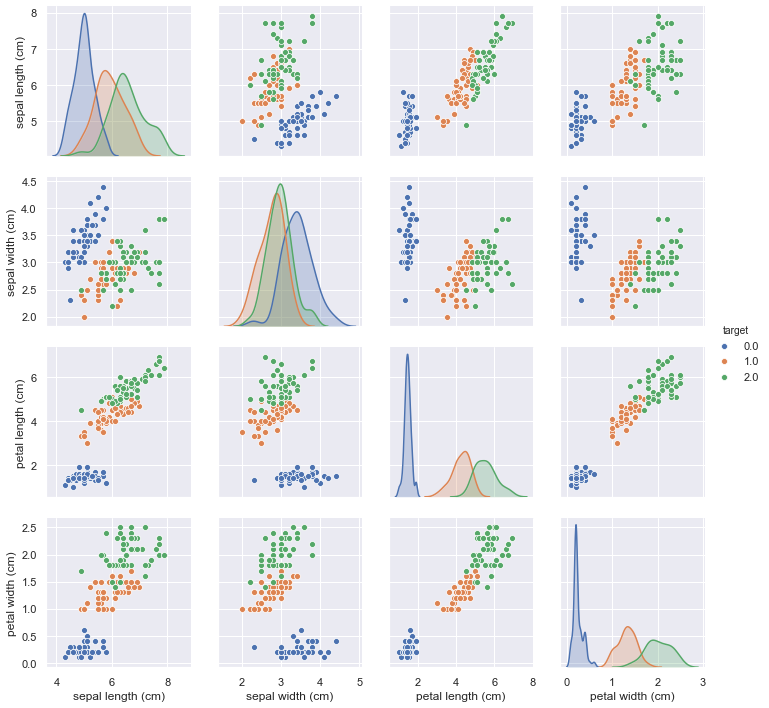

In [14]:
sns.pairplot(irisdf, vars=irisdf.columns[:-1], hue='target')

## Covariance and correlation coefficient

As we saw in the previous section, the variance of a dataset is computed as the average of the squared distances from the mean. 

We now extend this idea to two variables in a dataset, which leads us to the concepts of *covariance* and *correlation*.



### Covariance

The (population) [*covariance*](https://en.wikipedia.org/wiki/Covariance) between two variables in a dataset tells us if large values in one variable are associated with large values in the other and, conversely, if small values in one variable are associated with small values in the other. 

If we have two variables $x$ and $y$ in a dataset, we calculate the covariance as the average of products of differences from the mean for both variables:

$$
\mathrm{Cov}(x, y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}),
$$

with $\bar{x}$ and $\bar{y}$ being the means of the variables $x$ and $y$, respectively. 

Note that, unlike variance, which is always positive, covariance can be both positive or negative.

<br>

Let's think what's going on here 


- subtracting the means can be interpreted as shifting all the $x$ and and all the $y$ data to be distributed about zero.


- the covariance will then be large and positive when it is made up of a sum of large positive numbers (which we get through the product of two large positives, or two large in magnitude negatives)


- conversely the covariance will be large in magnitude and negative when it is made up of a sum of large in magnitude negative numbers (which we get through the product of two large in magnitude numbers of differing signs)


- and finally the covariance will be smaller in magnitude when larger numbers are multiplied with smaller numbers, and will be zero or near zero when the resulting postives and negatives cancel each other out when summed

<br>

The result is that a positive covariance means that the two variables vary in the same direction: large values in one variable are associated with large values in the other, and similarly small values in one variable are associated with small values in the other. 

On the other hand, a negative covariance means that large values of one variable are associated with small values of the other and vice-versa. 

Finally, a covariance close to 0 means that there is no linear relationship between the two variables.

<br>

Looking at the plots above (before looking at the numbers from the following cell, use the "eyeball norm" to estimate the covariances in terms of larger/smaller, positive/negative - do this for all the data, i.e. ignore the different colours.

<br>

Now let's actually calculate the covariances between the four measured variables in the Iris dataset:

In [15]:
# let's ignore the final column - the `target` or `class` variable
irisdf.iloc[:, :-1].cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


### Covariance Matrix

By computing covariances on the Iris dataset, we obtained more than a single value - we obtained a matrix. 

We refer to that matrix as a [*covariance matrix*](https://en.wikipedia.org/wiki/Covariance_matrix). It helps us to visually structure the covariances between two or more variables in a dataset. With $n$ variables in a dataset, the covariance matrix is an $n \times n$ symmetric matrix, as illustrated in [Figure 1](#fig:covariance_matrix). 

<img src="images/ch03_covariance_matrix.png" id="fig:covariance_matrix" width="250" alt="Figure 1: The illustration of a covariance matrix of the variables x and y." />

**Figure 1**: The illustration of a $2 \times 2$ covariance matrix between the variables $x$ and $y$.

<br>


The diagonal is filled with the covariances of variables with themselves - $\mathrm{Cov}(x, x)$ corresponds to the variance $\mathrm{Var}(x)$:

$$
\begin{aligned}
\text{Cov}(x, x) &= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(x_i - \bar{x}) \\
&= \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 \\
&= \text{Var}(x)
\end{aligned}
$$

Non-diagonal elements correspond to covariances between different variable pairs, and since $\mathrm{Cov}(x, y) = \mathrm{Cov}(y, x)$ the covariance matrix is symmetric.

Since the Iris dataset has 4 columns (variables), the covariance matrix is a $4 \times 4$ matrix.

### Correlation coefficient

We define the [*correlation coefficient*](https://en.wikipedia.org/wiki/Correlation_coefficient) $\rho_{x,y}$, also known as the [*Pearson product-moment correlation coefficient (PPMCC)*](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), as the covariance between two variables $\mathrm{Cov}(x, y)$ normalised by the product of their standard deviations:

$$
\rho_{x,y} = \frac{\mathrm{Cov}(x, y)}{\sigma(x)\sigma(y)}
$$

The correlation coefficient provides a measure of the linear correlation between the values from datasets $x$ and $y$.

# Probability and uncertainty

**Probability** provides a measure of [**uncertainty**](https://en.wikipedia.org/wiki/Uncertainty). 

We could think of it as the proportion of times a certain event occurs, or our degree of belief about an event occurring.


These two ways of thinking about probability map over to what are known as the [**Frequentist**](https://en.wikipedia.org/wiki/Frequentist_probability) and [**Bayesian**](https://en.wikipedia.org/wiki/Bayesian_probability) interpretations or methodologies. 

[Note that the definition Bayesian in terms of "belief" explains why is it sometimes described as "subjective probability"]


<br>

Further reading:

<https://en.wikipedia.org/wiki/Monty_Hall_problem>

<https://towardsdatascience.com/the-monty-hall-problem-388f71a73e1>

<https://stats.stackexchange.com/questions/22/bayesian-and-frequentist-reasoning-in-plain-english>

<https://towardsdatascience.com/statistics-are-you-bayesian-or-frequentist-4943f953f21b>

The **uncertainty** that we may want to  can be of two types: 

<br>

- [**Aleatoric**](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty): The underlying phenomenon is inherently random and the uncertainty arises from it, i.e. more knowledge, data or a better model will not reduce the uncertainty. 
    - ***Aleatoric*** $\approx$ "***randomness***"

<br>

- [**Epistemic**](https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty): The underlying phenomenon is deterministic but our model is imperfect due to limitations over things we could know perfectly in principle but do not know in practice, i.e. more knowledge, data or a better model would reduce the uncertainty. 
    - ***Epistemic*** $\approx$ "***lack of knowledge***"


<br>


Suggested [further reading](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2004.00050.x).


## Random variables

Unlike the *variables* we use elsewhere, e.g. in calculus, a [**random variable**](https://en.wikipedia.org/wiki/Random_variable) takes a value corresponding to the [**outcome(s)**](https://en.wikipedia.org/wiki/Outcome_(probability)) of a **random experiment**
(so building on above we might instead use the term *aleatory variable*)

A random [variable](https://en.wikipedia.org/wiki/Variable_(mathematics)) can be considered a function that takes an outcome (from the set of all outcomes) as input and returns a "value", e.g. a real number.  These values are sometimes termed *states* and the set of all of these states the *target space*.

Since we don't know the outcome before performing the experiment we don't know this value, hence it's "variable", i.e not fixed, and since we assume the experiment is not deterministic, it's a "random" variable. However, mathematically we can just consider it a function.

For instance, if you flip a coin, the two possible outcomes are "heads" (H) and "tails" (T). An example of a random variable would be a function that maps the outcome H to 0 and the outcome T to 1. 

As another example, let us say that we flip the coin 10 times. Then we could also define a random variable so that it maps the sequence of outcomes we get to the number of times we get H (so mapping multiple outcomes again to a real number).

If we were rolling three dice the random variable could map the outcome to the number of sixes, or to the sum of the three faces shown by the three dice.


### More definitions

Let us now define some other terms, some of which we already used:



- A **random experiment** describes a process that gives us uncertain results, e.g. a coin flip.



- The **outcome** of a random experiment is the result we obtain. If we flip a coin, two possible outcomes are H and T. Alternatively, if we pick a card from a deck of 52 cards, there are 52 possible outcomes. If we roll a six-sided die, the possible outcomes are 1, 2, 3, 4, 5, or 6. 



- The **sample space**, often denoted as $S$, is the set of all possible outcomes. For example, the sample space of a single six-sided die-rolling experiment is $\{1, 2, 3, 4, 5, 6\}$. The curly braces ($\{\}$) are used to denote sets (collections of elements). In an experiment where we flip a coin two times, the sample space is $\{\mathrm{HH}, \mathrm{HT}, \mathrm{TH}, \mathrm{TT}\}$. This is an example associated with a discrete random variable, we will also see continuous random variables where the sample space is infinite dimensional.



- An **event** is a set of outcomes, i.e. a subset of the sample space. An event has occurred when the outcome of the experiment is an element of the "event". Intuitively, it corresponds to a question we can ask about the outcome of a random experiment. For instance, if we roll a die, we can ask:
    - "Is the outcome a 6?"
    - "Is the outcome in the set $\{1, 3, 6\}$?"
    - "Is the outcome even, i.e. on the set $\{2, 4, 6\}$?"

Note that the single outcome 6 is an element of all three events. 

All 6 individual "outcomes" are also individual "events" (and termed [*elementary events*](https://en.wikipedia.org/wiki/Elementary_event).

<br>

A [**stochastic process**](https://en.wikipedia.org/wiki/Stochastic_process) is a general term for a process that consists of multiple random experiments, or a family of random variables, e.g. keep rolling a dice until you get a six.

[Figure 2](#fig:definitions_proba) summarises how these terms are related to each other and [Figure 3](#fig:definitions_proba_example) shows the case of a coin flip experiment.

<br>

<br>

<img src="images/ch03_definitions_proba.png" id="fig:definitions_proba" width="400" alt="Figure 1: Summary of the relationship between the terms defined in the context of probability theory." />

**Figure 2**: A **random experiment** is associated with various possible **outcomes**. These outcomes are mapped to real values by a **random variable**. There is thus a single random variable associated with the experiment. The **event** $A$ is a set of outcomes (subset of the **sample space**). Here, the event corresponds to a single outcome (“outcome 1.”).

<br>

<br>

<figure>
<img src="images/ch03_definitions_proba_example.png" id="fig:definitions_proba_example" width="400" alt="Figure 2: Example with a coin flip." />
</figure>

**Figure 3**: Two possible outcomes are "heads" (H) and "tails" (T), and therefore, the sample space is $\{H, T\}$. The random variable $X$ maps these outcomes to real values: $H \rightarrow 0$ and $T \rightarrow 1$. The event $A$ corresponds to a subset of the sample space, in our case: {H}.

### Discrete and continuous random variables

A random variable is **discrete** when it maps an outcome to a finite set of values, e.g. outcome of a die or a coin toss. 

On the other hand, a random variable is **continuous** when it maps an outcome to any value in a range. For instance, the temperature could theoretically be $8.0^{\circ}C$, or $8.05^{\circ}C$, or $8.053^{\circ}C$. The possible set of values in this case is infinite.

## Probability

### Properties

The **probability** associated with an event (including the elementary events, i.e. the individual outcomes) tells us how likely it is to occur. 

Probabilities must satisfy the following rules:


1. They must be a non-negative real number.
    
    
2. They cannot exceed 1.
    
    
3. The probability that any of the possible outcomes will occur is 1.
    
    
4. For two mutually exclusive events, the probability that either of the events occurs is equal to the sum of the probabilities that each event occurs.
    
    
<br>

Roughly speaking, a probability of 1 means that the event will always occur and a probability of 0 means that the event will never take place. 

However, in the case of *continuous* random variables, where the sample space (space of all possible outcomes) is infinite, a probability of 1 means that the event is *almost* certain to occur and a probability of 0 means that the event will *almost* never take place.  

For more on this see <https://en.wikipedia.org/wiki/Almost_surely>. This is the analogue or [*almost everywhere*](https://en.wikipedia.org/wiki/Almost_everywhere) in measure theory.

### Notation

Now that we have defined the terms we will use, let us look at the notation. 

We typically denote random variables with uppercase letters, such as $X$. 

The probability distribution associated with the random variable $X$ is denoted as $P(X)$. 

The probability that this random variable takes the value $x$ is denoted as $P(X=x)$, or simply $P(x)$.

## Probability distribution function

A [**probability distribution function**](https://en.wikipedia.org/wiki/Probability_distribution) is a function mapping each outcome to its probability mass (for discrete variables) or to probability density (for continuous variable) to occur. 

In the latter case we talk about the [**probability density function**](https://en.wikipedia.org/wiki/Probability_density_function) and often use the acronym **PDF**, while in the former we might talk about the [**probability mass function**](https://en.wikipedia.org/wiki/Probability_mass_function) (**PMF**).


### Probability Mass Functions

Probability functions of *discrete* random variables are called **probability mass functions** (or PMFs). 

For instance, let us say that we are performing a die-rolling experiment. We call $X$ the random variable corresponding to this experiment. Assuming that the die is fair, each outcome is *equiprobable*: if we run the experiment a large number of times, we will get each outcome approximately the same number of times. Here, assuming a six-sided die, there are six possible outcomes, so we have a  one over six chance of rolling each number.

Thus, the probability mass function describing $X$ returns $\frac{1}{6}$ for each possible outcome and 0 otherwise since we cannot get something different than 1, 2, 3, 4, 5, or 6. 

We can write:

$$
P(X=x) \equiv P(x) = 
\begin{cases}
    \frac{1}{6},& \mathrm{if}\, x \in S=\{1, 2, 3, 4, 5, 6\} \\
    0,              & \text{otherwise}
\end{cases}
$$

<br>

Also common is the notation

$$p_X(x) = P(X=x)$$

where $p_X(x)$ is a function from $\mathbb{R}$ into the interval $[0,1]$.

### Properties of Probability Mass Functions

Not every function can be considered as a probability mass function. 

A probability mass function must satisfy the following two conditions:

<br>

1. The function must return values between 0 and 1 for each possible outcome: $0 \leq P(x) \leq 1$ (or as above $p_X:\mathbb{R}\rightarrow [0,1]$).

<br>

2. The sum of probabilities corresponding to all the possible outcomes must be equal to 1:


$$
\sum_{x \in S} P(x) = 1  \qquad\text{or}\qquad \sum_{x \in S} p_X(x) = 1
$$

<br>


The value of $x$ can be any real number because values outside of the sample space are associated with a probability of 0, i.e. mathematically for any value $x$ not in the sample space $S$, $P(x)=0$.

Hence we can also legitimately write

$$
\sum_{x \in \mathbb{R}} P(x) = 1  \qquad\text{or}\qquad \sum_{x \in \mathbb{R}} p_X(x) = 1
$$

### Simulation of a die-rolling experiment

Let's simulate a die-rolling random experiment using the NumPy function `np.random.randint(low, high, size)`, which draws $n$ (`size`) random integers between `low` and `high` (excluded) from a [*discrete uniform distribution*](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) (i.e. each value equally likely to occur). 

We begin by simulating 20 die rolls:

In [16]:
def dice_experiment(n):
    # set the seed to make the random experiment reproducible
    # if you exclude this you should get a different result each time you run
    np.random.seed(1)
    # return n rolls from the S = {1, 2, 3, 4, 5, 6} sample space
    return np.random.randint(low=1, high=7, size=n)

n = 20  # number of die rolls
outcomes = dice_experiment(n)
print(outcomes)

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4]


This array contains 20 outcomes of the random experiment. 

Define $X$ to be the discrete random variable corresponding to the die rolling experiment. The probability mass function of $X$ is defined only for the possible outcomes and gives us the probability for each of them.

Let's visualise how many times each outcome occurred in the random experiment. 

By dividing the number of occurrences of each outcome (which we obtain using [`numpy.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) with the "return_counts" option) by the total number of rolls $n$ we get the probabilities. Assuming the die is fair, we expect to obtain a *uniform distribution*. 

We will use a stem plot [`plt.stem()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html) from Matplotlib to visualise these probabilities:

In [17]:
def probabilities(outcomes):
    # Extract the number of occurences for each outcome
    values, counts = np.unique(outcomes, return_counts=True)
    n = len(outcomes)  # total number of outcomes   
    return values, counts/n

def plot_probability_mass_function(values, probabilities):
    # Plot the probability mass function
    plt.stem(values, probabilities, use_line_collection=True)

    # Axis labels
    plt.xlabel(r'$x$')
    plt.ylabel(r'$P(x)$')

    # Ensure that ticks are displayed with the right step
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

    plt.show()
    

In [18]:
print(probabilities(outcomes))

(array([1, 2, 3, 4, 5, 6]), array([0.15, 0.15, 0.1 , 0.15, 0.25, 0.2 ]))


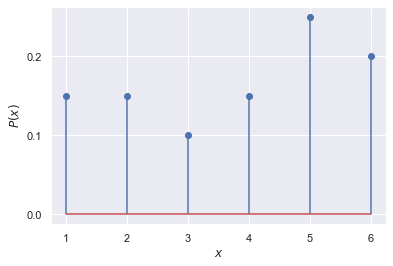

In [19]:
plot_probability_mass_function(*probabilities(outcomes))

Let's check that our probability mass function satisfies the condition:

$$
\sum_{x \in S} P(x) = 1
$$

In [20]:
print(sum(probabilities(outcomes)[1]))

1.0


With a uniform distribution (fair die), the plot would have the same height for each outcome (since the height corresponds to the probability, which is the same for each outcome of a die throw). 

However, the distribution shown in the above figure doesn’t look uniform. That is because we did not repeat the experiment enough times: the probabilities will equalise as we repeat the experiment a large number of times (in theory, an infinite number of times). 

Let's repeat the experiment for 1,000,000 die rolls:

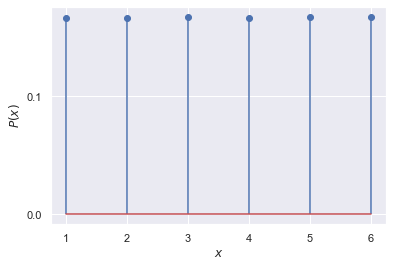

In [21]:
n = 1_000_000
outcomes = dice_experiment(n)
plot_probability_mass_function(*probabilities(outcomes))

We can see that the probability mass function now resembles a uniform distribution.

Let's print the probabilities to see how equal they actually are [more on this in the homework]:

In [22]:
print(probabilities(outcomes))

(array([1, 2, 3, 4, 5, 6]), array([0.166288, 0.166316, 0.166637, 0.166555, 0.167247, 0.166957]))


### Probability Density Functions

With continuous variables, there are an infinite number of possible outcomes (limited by the number of decimals you use). 

For instance, say we were somehow drawing a number between 0 and 1 - you might get an outcome of, for example, 0.413949834.

<br>

*Question*: What is the probability of getting this exact outcome?  

*Answer*: Zero!

<br>

Hence, we prefer to calculate the probability of getting an outcome within a *range* of values.

The $y$-axis of a probability functions in the case of continuous random variables is therefore not a probability. Rather it is called a **probability density** or just *density*. Thus, probability distributions for continuous variables are called [**probability density functions**](https://en.wikipedia.org/wiki/Probability_density_function) (or PDF). 

We will denote probability density functions using a lowercase $p$. For instance, the function $p(x)$ gives us the probability density corresponding to the value $x$.

The integral of the probability density function over a particular interval gives us the probability that a random variable takes a value in this interval. This probability is thus given by the area under the curve in this interval.

So note that the probability of a single value for $x$ can be interpreted as the integral over a zero width interval (area under curve $\approx$ zero width multiplied by a *finite* height), which would be zero.


### Example 1

Let's inspect an example of probability density function. 

We can randomly draw data from a [*normal distribution*](https://en.wikipedia.org/wiki/Normal_distribution) using the NumPy function [`np.random.normal(loc, scale, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), where `loc` is the mean, `scale` the standard deviation, and `size` the number of data points.

Let's use this to create 10,000 data points drawn randomly from a normal distribution with a mean of 0 and a standard deviation of 0.1, and plot the values on a histogram. 

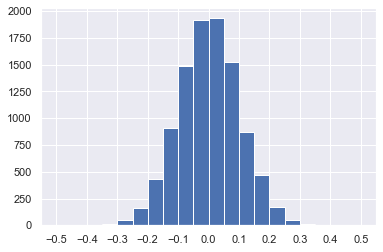

In [23]:
# set the seed to make the random experiment reproducible
np.random.seed(1)

mean = 0
standard_deviation = 0.1
n = 10_000

# Draw outcomes from a normal distribution
outcomes = np.random.normal(loc=mean, scale=standard_deviation, size=n)

# Plot histogram
hist = plt.hist(outcomes, bins=20, range=(-0.5, 0.5))

# Set the ticks step size
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

plt.show()

Note the classic "bell curve" trying to emerge. 

Try changing the `bins` parameter, the number of samples `n`, the mean, and the standard deviation in the example to see how it changes the bell.

<br>

The above, while being a good approximation, is still a discretised version of what is a continuous phenomenon underneath. Let us take this to the limit and try to plot the normal (or Gaussian) probability density function. 

The explicit form of the Gaussian probability density function is: 

$$p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. 

We will use its implementation from the normal continuous random variable [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

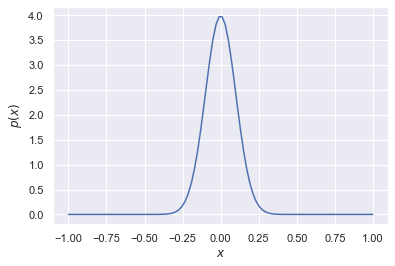

In [24]:
mean = 0
standard_deviation = 0.1

# Define the normal distribution
normal_distribution = scipy.stats.norm(mean, standard_deviation)

# Compute PDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)
y_values = normal_distribution.pdf(x_values)

# Plot PDF
plt.plot(x_values, y_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.show()

### Cumulative distribution function

Once we have the PDF, we can compute the [**cumulative distribition (or density) function**](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) which for a random valriable, which for a given $x$ value returns the probability that $X$ is less than or equal to $x$:

$$P(X\leq x)$$

See a homework exercise.

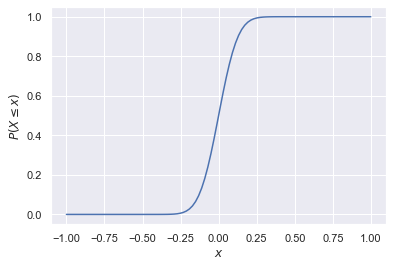

In [25]:
mean = 0
standard_deviation = 0.1

# Define the normal distribution
normal_distribution = scipy.stats.norm(mean, standard_deviation)

# Compute CDF values at a sequence of x locations between -1 and 1
x_values = np.linspace(-1, 1, 100)
y_values = normal_distribution.cdf(x_values)

# Plot PDF
plt.plot(x_values, y_values)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(X\leq x)$')
plt.show()

### Example 2

Let's go back to the Iris dataset. 

We know that the data comes from the three species of the Iris flowers. 

Let's plot the sepal length (first column) for Iris Setosa (`target=0`) and calculate the mean and standard deviation of each feature in each species. 

In [26]:
# DataFrame for Iris setosa
iris_setosa_df = irisdf.loc[irisdf['target'] == 0]
iris_setosa_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


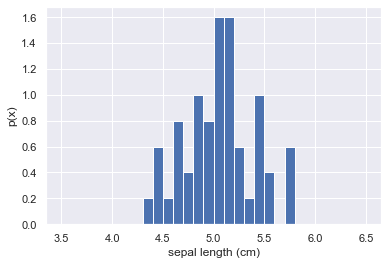

In [27]:
# Extract the sepal length as a numpy array.
data = iris_setosa_df['sepal length (cm)'].to_numpy()

# Plot the sepal length histogram
plt.hist(data, range=(3.5, 6.5), bins=30, density=True)

# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('p(x)')

plt.show()

It looks like a normal distribution might represent a reasonable model of this distribution - we only have 50 samples to go by.

To plot the normal distribution for sepal length, we need the mean and the standard deviation:

In [28]:
irisdf.groupby(['target']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In [29]:
irisdf.groupby(['target']).std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,0.352490,0.379064,0.173664,0.105386
1.0,0.516171,0.313798,0.469911,0.197753
2.0,0.635880,0.322497,0.551895,0.274650


Now that we have computed the mean and the standard deviation, we can use them to *estimate* the normal distribution of these measurements. 

For example, for target $0$ (Iris Setosa), the sepal length has a mean of $5.006 \,\text{cm}$ and standard deviation of $0.352490\,\text{cm}$. 

Here is the plot of the *estimated distribution* that describes sepal length for Iris Setosa:

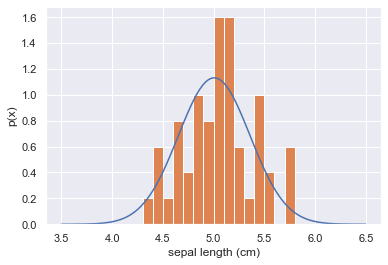

In [30]:
mean = 5.006  # cm
standard_deviation = 0.352490  # cm
normal_distribution = scipy.stats.norm(mean, standard_deviation)

# Compute PDF values
x_values = np.linspace(3.5, 6.5, 100)
y_values = normal_distribution.pdf(x_values)

# Plot
plt.plot(x_values, y_values)  # normal distribution
plt.hist(data, range=(3.5, 6.5), bins=30, density=True)  # iris setosa sepal length

# Label axes
plt.xlabel('sepal length (cm)')
plt.ylabel(r'p(x)')

plt.show()

Based upon this normal distribution, what is the probability that $x = 5.1\,\text{cm}$ is the measured and reported sepal length of an Iris Setosa? 

We can answer that question using the cumulative distribution function (CDF) and the fact that we note the measurements in the Iris dataset are at an accuracy that measures/rounds/stores only values to the closest 0.1cm. 

This means that instead of asking for the value $P(X=5.1)$ we should compute

$$P(5.1 - 0.05 \lt X\leq 5.1 + 0.05)$$

this gives us the probability that the sepal length lies in the interval of size 0.1 centred at the target value of $x = 5.1\,\text{cm}$.

We can calculate this value from the cumulative distribution function:

$$P(5.1 - 0.05 \lt X\leq 5.1 + 0.05) = P(X\leq 5.1 + 0.05) - P(X\leq 5.1 - 0.05)$$

In [31]:
# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

x = 5.1
probability = calc_probability(x, normal_distribution)

print(f'The probability of sepal length being {x} cm for iris setosa is {probability}.')

The probability of sepal length being 5.1 cm for iris setosa is 0.10888540054111928.


This is the integral under the blue curve above, over an interval of width 0.1 where we can observe the height of the curve at location 5.1 is around 1.1 (base $\times$ height $\approx$ 0.1) and so we see that the value we've calculated here looks correct.

## Monte Carlo methods

In general, Monte Carlo methods aim to use stochastic/probabilistic methods to estimate something that is deterministic (i.e. not stochastic). 

There is no general agreement on how Monte Carlo methods should be defined.  
Here is an attempt to define *Monte Carlo simulation* through an example of coin tossing (from <https://en.wikipedia.org/wiki/Monte_Carlo_method#Definitions>):


- **Simulation**: Drawing *one* [pseudo-random](https://en.wikipedia.org/wiki/Pseudorandomness) uniform variable $x$ from the interval $[0, 1]$ can be used to simulate the tossing of a coin: If $x \le 0.5$, we designate the outcome as "heads", but if $x > 0.5$, we designate it as tails. This is a simulation, but not a Monte-Carlo simulation.


- **Monte Carlo method**: Pouring out a box of coins on a table, and then computing the ratio of coins that land "heads" vs "tails" is a Monte Carlo method to estimate the probabilities of "heads" and "tails" in a coin toss, but it is not a simulation. 


- **Monte Carlo simulation**: Drawing a *large number* of pseudo-random uniform variables from the interval $[0, 1]$ at one time, or once at many different times, and assigning values less than or equal to 0.5 as "heads" and greater than 0.5 as "tails", is a *Monte Carlo simulation* of the behaviour of repeatedly tossing a coin.

### Example - Estimating that value of $\pi$ using a Monte Carlo method

One method to estimate the value of $\pi = 3.141592\ldots$ is by using a Monte Carlo method. 

This method consists of drawing a square with an inner circle. We then generate a large number of random points within the square and count how many fall in the enclosed circle:

<img src="images/pi-monte-carlo.png" />

<br>

By knowing the area of the circle $A_\mathrm{c} = \pi r^2$ and the area of the square $A_\mathrm{s} = (2r)^2 = 4r^2$, we can compute the probability of a random point falling both in the square and in the circle as the ratio of the size of the circle to that of the square:

$$P = \frac{A_\mathrm{c}}{A_\mathrm{s}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$$

Hence, we generate a large number of random points inside the square and count how many fall inside the circle. 

$$\pi = 4P = 4 \cdot \frac{\text{points inside the circle}}{\text{total points}}$$

In [32]:
import random

n_total = 100_000  # total number of points
x = np.random.uniform(low=-1, high=1, size=n_total)
y = np.random.uniform(low=-1, high=1, size=n_total)

z = np.sqrt((x**2) + (y**2))  # distance from the origin (0, 0)

n_circle = sum(z<=1)  # number of points falling in the circle
pi_estimate = 4 * n_circle/n_total

print(f'The estimate of pi is {pi_estimate}.')

The estimate of pi is 3.13948.


Let's look at the simulated points:

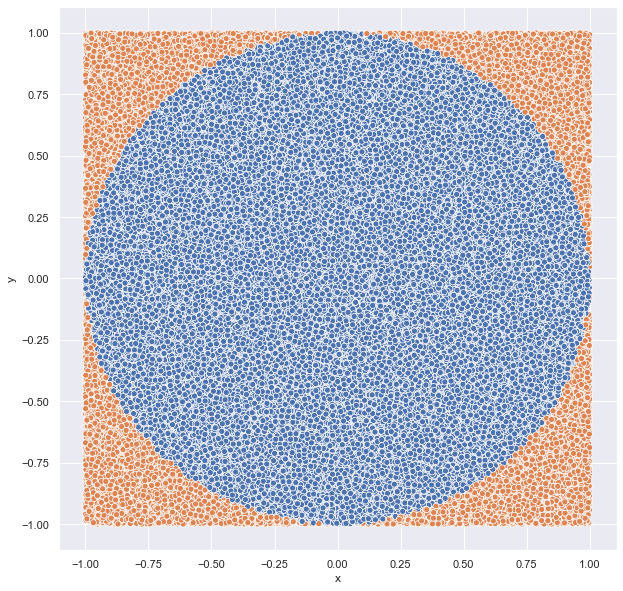

In [33]:
# Label points
in_out = np.where(z<=1, 'in', 'out')

# Plot points
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x, y=y, hue=in_out, legend=False)

# Axes labels
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Central Limit Theorem

The [**central limit theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) states that, if we consider $n$ independent random variables drawn from a(ny) distribution with large enough $n$ and average or sum their outcomes, the distribution of the results will be approximated by a Gaussian (normal) distribution. Let's see this in action.

We have seen that the outcome of a single die follows the uniform distribution, i.e. all six outcomes are equally likely - if we throw one die multiple times we converge to a uniform distribution - plot repeated next. 

But let's also us build a function that can simulate throwing `n_dice` number of dice, and sum their results, `n_trials` times. CLT tells us that the PDF of this should look like a normal rather than uniform distribution assuming that `n_dice` is large enough

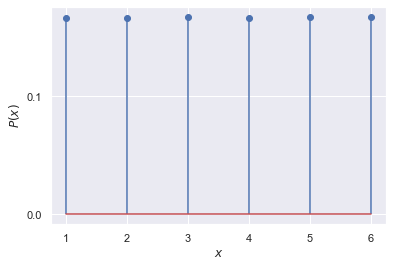

In [34]:
# throw one die 1M times
n = 1_000_000
outcomes = dice_experiment(n)
plot_probability_mass_function(*probabilities(outcomes))

In [35]:
def sum_distribution_dice(n_dice, n_trials=100_000):
    trials = np.zeros(n_trials)
    for i in range(n_trials):
        trials[i] = np.random.randint(low=1, high=7, size=n_dice).sum()

    return trials

Now, we’ll use this function to evaluate the distribution of the sums for 1, 2, and 20 dice:

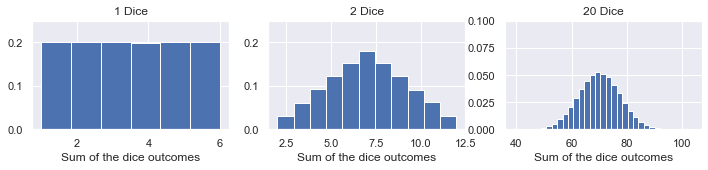

In [36]:
np.random.seed(1)

random_var_dice_1 = sum_distribution_dice(1)
random_var_dice_2 = sum_distribution_dice(2)
random_var_dice_20 = sum_distribution_dice(20)

_, axes = plt.subplots(1, 3, figsize=(12, 2))
ax0, ax1, ax2 = axes

ax0.hist(random_var_dice_1, bins=6, density=True) 
ax1.hist(random_var_dice_2, bins=11, density=True) 
ax2.hist(random_var_dice_20, bins=33, density=True) 

# Labels, limits, titles
ax0.set_ylim(0, 0.25)
ax0.set_title('1 Dice')
ax0.set_xlabel('Sum of the dice outcomes')

ax1.set_ylim(0, 0.25)
ax1.set_title('2 Dice')
ax1.set_xlabel('Sum of the dice outcomes')

ax2.set_ylim(0, 0.1)
ax2.set_title('20 Dice')
ax2.set_xlabel('Sum of the dice outcomes')

plt.show()

We observe that a uniform distribution (1 die) evolves to a normal distribution as the number of dice increases.

With one die we've already established that each of the 6 outcomes has an equal probability of 1/6.

With two dice we can get any outcome for their sum from 2 to 12. 

To get 2 or 12 we need both dice to show 1 or 6. Of the 36 possible combinations we can get each of these only once, and hence we expect their probability to be 1/36.

7 is the most common as we can get it through the largest number of combinations: $1+6$, $2+5$, $3+4$, $4+3$, $5+2$, $6+1$ - there are six of these and hence we expect its probability to be 6/36.

Let's check the result above is consistent with our expectation:

In [37]:
from collections import Counter
res = Counter(random_var_dice_2)
for dsum in range(2,13):
    # print out 36 times the probability computed based on the ratio,
    # this should approach 1,2,3,4,5,6,5,4,3,2,1 for large sample sizes
    print(dsum, res[dsum]/len(random_var_dice_2), 36*res[sum]/len(random_var_dice_2))

2 0.02786 0.0
3 0.05439 0.0
4 0.08474 0.0
5 0.1107 0.0
6 0.13853 0.0
7 0.16399 0.0
8 0.13956 0.0
9 0.11216 0.0
10 0.0827 0.0
11 0.05704 0.0
12 0.02833 0.0


## Joint Probability

The [**joint probability**](https://en.wikipedia.org/wiki/Joint_probability_distribution) is the probability that two or more events occur.

### Notation

The **joint probability** that the random variable $X$ takes the value $x$ and that the random variable $Y$ takes the value $y$ is written as:

$$
P(X=x, Y=y)
$$

We must consider the dependence between these events.


### Dependent and Independent Events

**Dependent events** are events that are related in the sense that the probability of one depends on the outcome of the other. 

For instance, if you randomly pick two coloured balls from a bag without replacement, the probabilities associated with the second pick will depend on the outcome of the first pick.

[Figure 4](#fig:dependent_events) illustrates the following example: there are 4 red balls and 2 blue balls in the bag. 

The probability of choosing a red ball is $\frac{4}{6}$ and a blue ball is $\frac{2}{6}$. 

If you pick a red ball the first time, the probability of picking another red ball in the second draw is now $\frac{3}{5}$; that of picking a blue ball is now $\frac{2}{5}$ (as illustrated in the bottom right). 

However, if you get a blue ball at the first draw, the probability of picking a red ball on the second draw is then $\frac{4}{5}$ and $\frac{1}{5}$
to pick another blue ball (top right). 

So the first draw clearly has an influence on the probability distribution of the second.

<img src="images/ch03_dependent_events.png" id="fig:dependent_events" width="200" alt="Figure: Examples of dependent events with a draw without replacement." />

**Figure 4**: An illustration of dependent events.

<br>

By contrast, **independent events** are events that do not interfere with each other. For instance, if you roll two dice, you do not expect that the outcome of one will affect the outcome of the other.

### Joint Probability of Independent and Dependent Events

#### Independent Events

If two random variables $X$ and $Y$ are independent, their joint probability is equal to the product of the probability of each event.

Mathematically, you can write:

$$ P(X=x, Y=y) = P(X=x) P(Y=y) $$

**Example**: If you throw a die and toss a coin, what is the probability to get a 6 and "heads"?

<br>

To answer this question, you need to consider both events. The joint probability is calculated by multiplying the probability of each event together:

$$
P(X=6, Y=\text{"heads"}) = \frac{1}{6} \times \frac{1}{2} = \frac{1}{12}
$$

Note that $P(Y=\text{"heads"})$ is a shortcut because random variables maps outcomes to real values: it means that the experiment associated with the random variable $Y$ has the outcome "heads".


#### Dependent Events

For dependent events, we need to use rules from conditional probabilities (discussed later) to calculate their joint probability.

### Marginal Probabilities and the sum rule

Marginal probabilities is the name given to probabilities that are *not* joint probabilities, i.e. probabilities of single events - the way we have considered them so far. 

Marginal probabilities are obtained from joint probabilities by *marginalising* the other variables using the **sum rule of probability**: we add the joint probabilities. This is the probability of our event irrespective of the outcomes of the other variables.

Mathematically, it is defined as follows:

$$
P(X=x) = \sum_{y} P(X=x, Y=y)
$$

The summation in the above equation is valid for the case of *discrete* random variables. For *continuous* random variables, this would be replaced by an integral over the other variables. The marginal probability $P(X=x)$ is the probability that $X=x$ without considering the other variables. 

Let's consider again the case of a combined die throw ($X$) and coin flip ($Y$) experiment. 
For instance, the marginal probability of $X=6$ is the sum of the following joint probabilities: $P(X=6, Y=\text{"heads"})$ and $P(X=6, Y=\text{"tails"})$. 

It is thus:

$$
\sum_y P(X=6, Y=y) = P(X=6, Y=\text{"heads"}) + P(X=6, Y=\text{"tails"}) = \frac{1}{12} + \frac{1}{12} = \frac{1}{6}
$$

See also <See also https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/>

### The Iris dataset revisited

Let's return to the Iris dataset.

In [38]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


The first row of data is `[5.1, 3.5, 1.4, 0.2]`. 

Let's assume that each of these four measurements are independent.

Can we use the normal probability distributions we computed for the Iris dataset above to estimate the probability that this row comes from the estimated distributions?

<br>

**Note**: This is not exactly the same question as asking "What is the probability that these measurements belong to an Iris flower of a particular species?". 

We will be able to formulate this second question only after we have learned Bayes theorem. 

<br>

For now due to our assumption of independence we can use the fact that the joint probability is equal to the product of the probability of each event:

In [39]:
# Calculate the means and standard deviations for our four features and three species
means = irisdf.groupby('target').mean().to_numpy()
stds = irisdf.groupby('target').std().to_numpy()

# Define the normal distributions for each feature and species
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([scipy.stats.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p
      
data = [5.1, 3.5, 1.4, 0.2]

for cls in range(3):
    # calculate the probability for each class/target species
    p = cls_probablility(data, cls, distributions)
    print("Probability of %s being from the estimated distribution of iris %s = %f" % 
          (str(data),iris['target_names'][cls],p))

Probability of [5.1, 3.5, 1.4, 0.2] being from the estimated distribution of iris setosa = 0.000798
Probability of [5.1, 3.5, 1.4, 0.2] being from the estimated distribution of iris versicolor = 0.000000
Probability of [5.1, 3.5, 1.4, 0.2] being from the estimated distribution of iris virginica = 0.000000


## Conditional Probability

In some cases, we want to calculate the probability that an event will occur knowing that another event has already occurred. 

For instance, we can ask what is the probability of drawing a pair of kings in a deck of playing cards. We need to calculate the probability of getting a king in the first draw, and then the probability to draw a second king. We want to know the probability of the second draw *under the condition* that we got a king in the first draw.

This is called [**conditional probability**](https://en.wikipedia.org/wiki/Conditional_probability): the probability of an event given that another event has occurred. 

We refer to conditional probability using the vertical bar (“\|”):

$$
P(Y=y \, | \, X=x)
$$

The conditional probability $P(Y=y \, | \,  X=x)$ is the probability that the random variable $Y$ equals $y$ *given that* the random variable $X$ equals $x$. 

Note that this notation differs from $P(Y=y, X=x)$, which is the joint probability that both $X=x$ and $Y=y$.

### Example

Samantha’s car sometimes shows a warning light when there is a problem, but it is defective: sometimes the warning light comes on even when there is no problem, and sometimes the light is off but the car needs repair.

Let us call $P(\text{"warning light"})$ the probability of the event “the warning light is on” and $P(\text{"needs repair"})$ the probability of the event “the car needs repair”.

[Figure 5](#fig:conditional_proba) illustrates the probabilities that the car needs repair (in blue) and the probability that the warning light is on (in red). The figure shows the data for five observations (the five columns from ‘Obs. 1’ to ‘Obs. 5’). For each of them, Samantha investigated the status of the car (needs repair or not) and noted the warning light (on or off). A blue square indicates that the car needed repair and a red square that the warning light was on. For instance, in the first observation, the car needed repair but the warning light was off (no red square).

<img src="images/ch03_conditional_proba.png" id="fig:conditional_proba" width="400" alt="Figure 5: The probability that the car needs repair is illustrated in blue and the probability that the warning light is on is illustrated in red, for five observations." />

**Figure 5**: The probability that the car needs repair is illustrated in blue and the probability that the warning light is on is illustrated in red, for five observations.

<br>

Based on our five observations we can see that $P(\text{"needs repair"}) = \frac{4}{5}$ because there are four observations where the car needed repair out of a total of five observations. Similarly, $P(\text{"warning light"})=\frac{2}{5}$ because there are two observations where the warning light was on. There is also an observation with a blue and a red square: the car needed repair and the warning light was on, so $P(\text{"needs repair"}, \text{"warning light"})=\frac{1}{5}$.

<br>

Let's examine the conditional probabilities for this example. The statement $P(\text{"needs repair"} | \text{"warning light"})$ is the probability that the car needed repair given that the warning light was on. We can think of this probability as follows: we take only the observations where the warning light was on (‘Obs. 4’ and ‘Obs. 5’), and
then we look at the proportion of observations where car needed repair. These conditions are met in one observation out of the two so $P(\text{"needs repair"} \, | \, \text{"warning light"}) = \frac{1}{2}$.

The same idea can be used to find $P(\text{"warning light"} \, | \, \text{"needs repair"})$. We take the observations where the car needed repair and consider the number of times the warning light was on. We can see that this is one observation out of four.

The link between *conditional* and *joint* probability is formalised in the next section.

### The Product Rule of probability

For discrete random variables, the probability that $X=x$ *and* $Y=y$ (joint probability) equals the probability that $Y=y$ given that $X=x$ (conditional probability) multiplied by the probability that $X=x$.

Mathematically that is:

$$
P(X=x, Y=y) = P(Y=y \, | \, X=x) P(X=x)
$$

This is the *product rule of probability*, also called the *chain rule of probability*. Equivalently, under the assumption that $P(X=x) \ne 0$,  we can write:

$$
P(Y=y \, | \, X=x) = \frac{P(X=x, Y=y)}{P(X=x)}
$$

### Example

Let's try to understand the logic behind these two formulations of the product rule using the previous faulty example.

First, the joint probability
$P(\text{"needs repair"}, \text{"warning light"})$ satisfies:

$$
P(\text{"needs repair"}, \text{"warning light"}) = P(\text{"warning light"} \, | \, \text{"needs repair"}) P(\text{"needs repair"})
$$

<br>

Since $P(\text{"needs repair"})$ is less than or equal to 1, the probability that the car needs repair and the warning light is on (i.e. $P(\text{"needs repair"}, \text{"warning light"})$) will be smaller or equal to  $P(\text{"warning light"} \, | \,  \text{"needs repair"})$. 

To consider all observations, we need to multiply by the proportion of observations where the car needs repair (i.e. $P(\text{"needs repair"})$).

<br>

Using the probabilities we calculated above, this is

$$
\frac{1}{5} = \frac{1}{4} \times \frac{4}{5}
$$


<br>

<br>


Let's see the second statement with the same example:

$$
P(\text{"warning light"} \, | \,  \text{"needs repair"}) = \frac{P(\text{"needs repair"}, \text{"warning light"})}{P(\text{"needs repair"}) }
$$

Similarly, to go from all observations to only the observations where the car needs repair, we need this time to divide by $P(\text{"needs repair"})$.

### More Events

We can generalise the product rule to more events. For instance, with three events $A$, $B$ and $C$, we would have:

$$
P(A, B, C) = P(A | B, C) P(B, C)
$$

This means that the probability that the events $A$, $B$ and $C$ occurred is equal to the probability that $A$ occurred given that $B$ and $C$ occurred multiplied by the probability that $B$ and $C$
occurred.

<br>

Note that we can chain these probability products. Since the product rule says that:

$$
P(B, C) = P(B | C) P(C)
$$

We get:

$$
P(A, B, C) = P(A | B, C)  P(B | C) P(C)
$$


# Machine Learning

Let's start with a quote:

>"*A computer program is said to learn from experience E with respect to some task T and some performance measure P if its performance on T, as measured by P, improves with experience E.*" - (Toni Mitchell, 1997)

Further background reading:

- <https://towardsdatascience.com/what-is-machine-learning-and-types-of-machine-learning-andrews-machine-learning-part-1-9cd9755bc647>

- <https://machinelearningmastery.com/what-is-machine-learning/>


<br>

and a figure taken from <http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram> which has an interesting discussion, including: 

- the "danger zone" is where they place people who "know enough to be dangerous"

- and, "To me, data plus math and statistics only gets you machine learning, which is great if that is what you are interested in, but not if you are doing data science. Science is about discovery and building knowledge, which requires some motivating questions about the world and hypotheses that can be brought to data and tested with statistical methods..."

<br>
<img src="./images/Data_Science_VD.png" width=300x>

*(Figure: <http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram>)*



## Some definitions 



- **Labelled data** is data that was previously annotated (most likely by a human) to show the expected result of running the model/algorithm, e.g. an image of a cat, accompanied by metadata that identifies it as a cat. 



- **Unlabelled data** is data without annotations, e.g. an image of a cat without any additional information to help us identify it as a cat. 


<br>


- [**Supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) uses labelled data to *train* an algorithm to reproduce the task that the labelled data serves as examples of. 



- [**Unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) uses unlabelled data to extract natural patterns from data, e.g. clusters of similar data points.


- [**Semi-supervised learning**](https://en.wikipedia.org/wiki/Semi-supervised_learning) uses both labelled and unlabelled data in order to try to achieve the best of both previous approaches.

## Supervised learning

To perform supervised learning tasks, we need a way to estimate probability distribution functions for a random variable from a set of labelled data. 


- When the random variable is **discrete**, this is called a **classification** task


- When the random variable is **continuous**, this is called a **regression** task. 


<br>


**Linear Regression** represents the simplest machine learning algorithm for a regression task, but there are many more. We've already seen this, and will revisit it again later in this lecture. 

<br>


Supervised machine learning can be interpreted  as a conditional probability problem.


Let us begin by looking at the way of building a probability distribution from data. 

## Bayes' Theorem

As a first step, let us see how the Bayes' theorem can be used to reverse conditional probability. 

Let's say that we have two random variables, $X$ and $Y$, and show that we can use the Bayes’ theorem to go from $P(Y=y | X=x)$ to the reverse probability $P(X=x \, | \, Y=y)$.

To do that, the Bayes’ Theorem uses the sum rule and the product rule, as we learned previously in this lecture, as follows.

The product rule tells us that:

$$
P(Y=y \, | \, X=x) = \frac{P(X=x, Y=y)}{P(X=x)}
\qquad (2)
$$

Similarly, the product rule tells us that the reverse probability of $X=x$, given that $Y=y$ is expressed as:

$$
P(X=x \, | \, Y=y) = \frac{P(Y=y, X=x)}{P(Y=y)}
$$

which can also be written as follows:

$$
P(Y=y ,X=x) = P(X=x \, | \, Y=y)P(Y=y)
\qquad (3)$$

In addition, note that the probability of getting $X=x$ and $Y=y$ ($P(X=x ,Y=y)$) is equivalent to the probability of getting $Y=y$ and $X=x$ ($P(Y=y ,X=x)$):

$$
P(Y=y, X=x) = P(X=x, Y=y)
$$

<br>

We can therefore replace the numerator in [Equation 2](#eq:prod_y_given_x) with  [Equation 3](#eq:joint_y_x) and arrive at Bayes’ Theorem:

$$
P(Y=y \, | \, X=x) = \frac{P(X=x \, | \, Y=y) P(Y=y)}{P(X=x)}
\qquad (4)
$$

Bayes’ theorem represents the means by which we can go from $P(Y=y \, | \, X=x)$ to the reverse probability $P(X=x \, | \, Y=y)$.

<br>

Here, $P(Y=y)$ is called the [**prior probability**](https://en.wikipedia.org/wiki/Prior_probability), and $P(Y=y \, | \, X=x)$ is called the [**posterior probability**](https://en.wikipedia.org/wiki/Posterior_probability).

Use of prior and posterior describes that these are the probability of the event $Y$ before seeing the data ($P(Y=y)$) vs the probability of event $Y$ *in light of* the data at hand ($P(Y=y \, | \, X=x)$).

<br>

In terms of classification


- $P(Y)$ is the *prior probability* of the class $Y$. 


- $P(X)$ is the *prior probability* of the predictor $X$. 


- $P(X|Y)$ is the [*likelihood*](https://en.wikipedia.org/wiki/Likelihood_function), or the probability of the predictor given the class. We will discuss this more later. 


- $P(Y|X)$ is the *posterior probability* of the class $Y$, given the predictor $X$. This is the most interesting quantity here and the one we are most likely interested in calculating. 

## Naive Bayes classifier

Take a look at <https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/> for an application of Naive Bayes to the Iris dataset, which we will also consider as an example from the perspective of performing classification.

In the context of the Iris dataset, the inputs (or vector $X$) are the four measurements in each row: sepal/petal, length and width. 

The output $Y$ is the class - here the species of the flower. 

The classification task, then, is to assign probabilities to each class, given a set of inputs $X$, i.e. to calculate $P(Y|X)$.

From Bayes theorem, to calculate $P(Y|X)$, we need $P(X|Y)$, $P(Y)$, and $P(X)$:

$$
P(Y=y \, | \, X=x) = \frac{P(X=x \, | \, Y=y) P(Y=y)}{P(X=x)}
$$

$P(Y)$ is the prior probability of class $Y$ - i.e. the probability of the data belonging to a particular class before we've seen $X$.

Since our dataset contains 50 data points for each of the three classes, the prior probabilities of all three classes is $P(Y)=\frac{1}{3}$. 

$P(X)$ is the probability of observing the data value(s) $X$, **regardless of the class** (i.e. using the distribution for all data), 

while $P(X|Y)$ is the probability of observing the data value(s) $X$, **given that the class is** $Y$ (i.e. using the distribution for the data for a particular class). 


<br>

An important assumption we need to make to proceed from here is that for our four measured features in the Iris dataset:

$$
P(X=(x_1, x_2, x_3, x_4)) = P(X_1=x_1) \cdot P(X_2=x_2) \cdot P(X_3=x_3) \cdot P(X_4=x_4),
$$

which results from the assumption that the four features of this dataset are [**independent**](https://en.wikipedia.org/wiki/Independence_(probability_theory)). This is not necessarily true in practice - the features are rarely truly independent. 


However, this assumption already lets us make powerful predictions by constructing what is called the [**Naive Bayes Classifier**](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). 

The word *naive* in the name points at our clearly naive assumption of the independence of features. 

Let's ignore this limitation and build our naive Bayes classifier - our first classifier. 

<br>

For further reading try <https://machinelearningmastery.com/better-naive-bayes/>

<br>

Note that we already learned how to calculate $P(X\, | \,Y)$ for this dataset, although we did not necessarily have the vocabulary to describe it then. 

Recall that this was what we implemented in the function `cls_probablility` above, and repeated below.


In [40]:
# Calculate the means and standard deviations for our four features and three species
means = irisdf.groupby('target').mean().to_numpy()
stds = irisdf.groupby('target').std().to_numpy()

# Define the normal distributions for each
distributions = []
for mvec, sdvec in zip(means, stds):
    distributions.append([scipy.stats.norm(m, sd) for m, sd in zip(mvec, sdvec)])

# Since the smallest measurement in the dataset is 0.1 cm,
# we use the range (x-eps) - (x+eps) (with eps=0.05) to calculate the probability.
def calc_probability(x, distribution, eps=0.05):
    # use the cdf = cumulative density function
    return distribution.cdf(x+eps) - distribution.cdf(x-eps)

def cls_probablility(data, cls, distributions):
    # This is P(X|Y) in our example, i.e. the joint prob of X given the distribution
    # corresponding to class Y.
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], distributions[cls][feat])    
    return p

def calc_likelihood(data):
    # calculates P(X|Y) for each class Y
    class_probs = []
    for cls in range(3):
        p = cls_probablility(data, cls, distributions)
        class_probs.append(p)
    return class_probs

print(calc_likelihood([5.1, 3.5, 1.4, 0.2]))

[0.0007982648713139491, 3.7217595375229145e-21, 2.4644816812620406e-28]


Now, we need to compute the prior probability of $X$, i.e. $P(X)$.

In [41]:
# Subscripting to remove the last column which is the target variable
# these are therefore the means and stds of the entire 150 rows of data, 
# i.e. all of our measurements, calc_prior_X is then the function that 
# computes the joint probability that our X data is from the 4 distributions
# for the 4 features.
means = irisdf.mean().to_numpy()[0:4]
stds = irisdf.std().to_numpy()[0:4]

prior_dists = [scipy.stats.norm(m, s) for m, s in zip(means, stds)]

def calc_prior_X(data):
    # This is P(X) in our example, i.e. the joint prob of X given the distribution
    # corresponding to all of our data irrespective of class.
    # initialise p - as we're going to be multiplying probabilities, initialise it to 1
    p = 1
    # for every feature, calculate its probability and multiply the results together
    for feat in range(4):
        p *= calc_probability(data[feat], prior_dists[feat])
    return p

print(calc_prior_X([5.1, 3.5, 1.4, 0.2]))

3.6134021278041095e-07


Finally, we are ready to write the complete naive Bayes' classifier using the above two calculations for $P(X)$ and $P(X\, |\, Y)$ along with the observation earlier that $P(Y)=1/3$ for all three classes.

In [42]:
def calc_naive_bayes(data):
    # Calculate P(Y|X)=P(X|Y)*P(Y)/P(X) - returns the probabilities for each class Y
    # given the data X.
    # likelihood is P(X|Y):
    likelihood = calc_likelihood(data)
    # P(Y) - from the data, we know that all three classes are equally likely:
    class_prior = [0.33, 0.33, 0.33]
    # P(X):
    data_prior = calc_prior_X(data)
    # this calculates P(Y|X)=P(X|Y)*P(Y)/P(X) for each class
    class_densities = [(l*cp) / data_prior for l, cp in zip(likelihood, class_prior)]
    # this normalises the results so that they sum to 1
    class_probs = [cd / sum(class_densities) for cd in class_densities]
    
    return class_probs

print(calc_naive_bayes([5.1, 3.5, 1.4, 0.2])) # We know that the target for this is 0
print(calc_naive_bayes([5.7, 2.8, 4.1, 1.3])) # We know that the target for this is 1
print(calc_naive_bayes([5.9, 3.0, 5.1, 1.8])) # We know that the target for this is 2

[1.0, 4.662311560067618e-18, 3.087298176112257e-25]
[0.0, 0.9998100192569429, 0.00018998074305718175]
[0.0, 0.06311162813892321, 0.9368883718610769]


### Accuracy

Here, we have a first functional classifier that gives us the probability of each line of data being in each class $Y$, given the input $X$. 

It seemed to work well for the three examples we tried above (one for each class), but let's calculate an overall accuracy of this classifier but testing it on all of our labelled data.

<br>

We define accuracy as:

$$
\text{accuracy} = \frac{\text{number of correct predictions}}{\text{total number of predictions}}
$$

In [43]:
# Now we will be using our trained model to do inference 
# pull out which entry has the highest probability
predictions = [np.argmax(calc_naive_bayes(X)) for X in iris['data']]

# assign a 1 if our predicted class matches the states class from the dataset
correct_predictions = [1 if prediction==target else 0 for prediction, target in zip(predictions, iris['target'])]

# what proportion did we get right?
accuracy = float(sum(correct_predictions)/len(correct_predictions))

print(f'Accuracy = {accuracy}')

Accuracy = 0.96


So our seemingly *naive* Bayes classifier has 96% accuracy on this dataset! 

Note that given the three classes our baseline for accuracy is 33% (as in in a multiple choice exam where each question has three answers, you would expect to get 33% just by guessing).

<br>

<br>

However, there is something *VERY WRONG* about using the same data for both model training and for testing/inference... 


We are using the same data to train the model and then test it - this is like giving a student the model answers during an exam. The correct way would be to split our data into training and testing sets, where we use the training dataset to train our model, and then the test dataset to evaluate its performance. 

<div class="optional">

## Likelihood [$\star$]

We utilised a quantity we referred to as [**likelihood**](https://en.wikipedia.org/wiki/Likelihood_function) above - let's say a bit more on this.


- Probability expresses uncertainty about data given the distribution. 


- Likelihood expresses uncertainty about the distribution given the data. Note that likelihoods do not necessarily sum to 1. 


<br>

<br>

The likelihood can be defined as the function of $\theta$

$$L_x(\theta) := P(\mathbf{x} \, | \, \theta) $$

where $\theta$ are **parameters** describing the probability distribution function.

It represents the likelihood of observing the data $\mathbf{x}$ for the random variable $X$ given the model parameters.


<br>

<br>

Assuming that the data is $\mathbf{x}  = (x_1, x_2, x_3, \ldots , x_n)$  then we can write

$$L_x(\theta) = P(x_1 \, | \, \theta) \cdot P(x_2 \, | \, \theta) \cdot P(x_3 \, | \, \theta) \cdot\ldots\cdot P(x_n \, | \, \theta)$$ 

<br>

[NB. Since $\theta$ is not a random variable but rather denotes unknown parameters that describe the PDF, sometimes you will see a semi-colon used to indicate the conditional probability, i.e. $P(x_1 \, ; \, \theta)$ etc.]

<br>

Note that we ideally do not want to multiply so many potentially very small numbers together (e.g. this could lead to underflow) - taking logs is a trick to deal with this.

</div>

<div class="optional">

### The (negative) log likelihood  [$\star$]

The [**log likelihood**](https://en.wikipedia.org/wiki/Likelihood_function#Log-likelihood) takes the form

$$\log(L_x(\theta)) = \sum_{i=1}^{n} \log(P(x_i | \theta))$$

<br>

Note that we are going to want to *maximise* likelihood.

Assuming we do this via an optimisation, and noting that when performing optimisation we generally formulate it in terms of an error, loss or cost function which we seek to minimise, explains why it is a common convention to talk about the *negative log likelihood*, and to seek to minimise this quantity, i.e.

$$-\log(L_x(\theta)) = -\sum_{i=1}^{n} \log(P(x_i | \theta))$$

<br>

Further reading: "Negative log likelihood explained" <https://medium.com/deeplearningmadeeasy/negative-log-likelihood-6bd79b55d8b6>

</div>

<div class="optional">

## Maximum likelihood estimation  [$\star$]

We can use (observed) data to estimate the properties of the distribution by using a method called [**maximum likelihood estimation**](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE). 

Here, we calculate the likelihood of observing the data we have ($\mathbf{x}$), for different values of the model parameters ($\theta$), choosing the value of $\theta$ that maximises $L_x(\theta)$, i.e.

$$\operatorname*{arg\,max}_\theta \; L_x(\theta) $$

[arg max: <https://en.wikipedia.org/wiki/Arg_max>]

<br>

And as explained above, in practice we would often in practice seek to minimise negative log likelihood:

$$\operatorname*{arg\,min}_\theta \; \left[-\log (L_x(\theta))\right] $$

<br>

Further reading: <https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/>

</div>

<div class="optional">

### Example [$\star$]

Let's see an example of MLE in action. 

Say we have a bag full of red and green poker chips of an unknown proportion. 

[See the description under the section "Six of one and half a dozen of the other " here: <https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2004.00050.x>]

We are allowed to draw one chip at a time from this bag (without replacement) - this can be seen as sampling from this unknown distribution of poker chips. We can then use the sampled data (the colours of the chips drawn) to estimate the parameter(s) $\theta$ that describe this distribution. 

In this case we take $\theta$ to represent the proportion of red and green chips in the bag, and we are going to use a [**brute force**](https://en.wikipedia.org/wiki/Brute-force_search)
optimisation/search approach to find the best choice for $\theta$. 

</div>

[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 2.52006963742148e-38, -0.0, 0.0, 0.0, -0.0]
Likelihood maximised at: 0.6


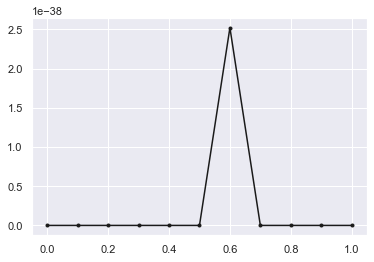

In [44]:
import random
import math

random.seed(42)


def draw(frac_red, k=20):
    # draw k chips from the bag comprising frac_red*100 red chips
    # and (1-frac_red)*100 green chips
    return random.sample(['red']*int(frac_red*100) + ['green']*int((1-frac_red)*100), k=k)


def calc_prob_single(outcome, frac_red):
    # calculate the probability of "outcome" occurring given
    # fraction of red chips, where outcome could be red or green
    assert(outcome in ('red', 'green'))
    if outcome == "red":
        return frac_red
    else:
        return 1 - frac_red


def update_frac(frac_red, total, result):
    # update the remaining chips in order to update the
    # fraction red value
    nums = [int(frac_red * total), int((1-frac_red) * total)]

    if result == "red":
        nums[0]-= 1
    else:
        nums[1]-= 1
    return float(nums[0]/sum(nums))


def calc_prob(results, frac_red, total):
    # initialise to 1 as we'll be multplying
    prob = 1
    # loop over the chips
    for result in results:
        # calculate the probability of the current chip 
        # based on the current frac_red (theta) value
        p = calc_prob_single(result, frac_red)
        prob *= p
        frac_red = update_frac(frac_red, total, result)
        
    return prob


TRUE_PROPORTION = 0.6

# Here we draw 100 chips from the bag, using the true proportion.
results = draw(TRUE_PROPORTION, k=100)

# From this point forth, we will only use the drawn chips in an attempt
# to estimate the true proportion of chips. 

# Possible values of the proportion: 0.0, 0.1, 0.2, 0.3, ...., 0.9, 1.0
allks = [x/10 for x in range(0, 11)]

# Calculate the probability of observing this data (i.e. likelihood), for each value of the proportion
probs = [calc_prob(results, x, 100) for x in allks]

print(probs)

print('Likelihood maximised at:', allks[np.argmax(probs)])

plt.clf()
plt.plot(allks, probs, 'k.-')
plt.show()

Note that the likelihood is highest (although note a very small number still) at 0.6, leading to our MLE estimate of 0.6, which is the correct value!

<div class="optional">

## Maximum a posteriori estimation [$\star$]

Maximum likelihood estimation as used above is a frequentist approach and works well when data is abundant. 

With less data, Bayesian methods often perform better. The Bayesian equivalent to MLE is called [**maximum a posteriori estimation**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation), or MAP. 

<br>

Let's revisit our problem from this Bayesian perspective. 

The probability of the red chip proportion $\theta$ being any particular value is given as follows (using Bayes' theorem):

$$
P(\theta \, | \, \mathbf{x}) = \frac{P(\mathbf{x} \, | \, \theta) P(\theta)}{P(\mathbf{x})}
$$

We are interested in the value of $\theta$ that maximises the above probability. 


<br>

Note that since we are not interested in the probability itself, but only in the value of $\theta$ that maximises the above expression, we can ignore the denominator which is independent of $\theta$, and instead solve

$$
\operatorname*{arg\,max}_\theta P(\theta \, | \, \mathbf{x}) = P(\mathbf{x} \, | \, \theta)  P(\theta)
$$

<br>

If we had some prior information about the probabilities of certain values of $\theta$ being different from others, that information could be incorporated in this approach via the $P(\theta)$ above. 

If we have no such prior information, we would assume all values of $\theta$ to be equally likely (uniform distribution), in which case the optimisation above turns into a maximisation of $P(\mathbf{x}  \, | \, \theta)$, which is of course the same as MLE. 

<br>

Further reading:

<https://machinelearningmastery.com/maximum-a-posteriori-estimation/>

<https://stats.stackexchange.com/questions/95898/mle-vs-map-estimation-when-to-use-which>

</div>

<div class="optional">

## Linear regression [$\star$]

Recall that linear regression can be written as 

$$y = \beta_0 + \beta_1 x$$

i.e. fitting a straight line to data points.

However, this way of writing our "model" does not explicitly account for, i.e. provide a representation of, the inevitable errors that occur when our "model" cannot exactly describe all of the given data.

To do this, we can write linear regression in the form

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

where $\epsilon$ is now a stochastic component or the *residual* (or *error*). 

For a fixed known $x$, $y(x)$ is a random variable.

<br>
    
Some assumptions for linear regression:


- The residuals are all independent


- The residuals are identically distributed, i.e. they are all drawn from the same distribution (e.g. same mean and variance)


- The mean of the distribution of residuals is zero. 


- Hence the random variable $y(x)$ ($y$, given an input $x$) has a mean of $\bar{y}$ and standard deviation $\sigma$, where the mean is given by $\bar{y} = \beta_0 + \beta_1 x$, i.e. for a given $x$ is defined by $\beta_0$ and $\beta_1$

<br>

More commonly, the input will contain more than one variable, which we can call $x_1$, $x_2$, \ldots, $x_n$. In this case, 

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$$


</div>

<div class="advanced">

## Maximum likelihood estimation for linear regression [$\star\star$]


Maximum likelihood estimation represents an approach to find the $\beta$ and $\sigma$ parameters, that maximises the likelihood


$$P(\mathbf{y} \, | \, \mathbf{x}, \theta) $$

where $\theta = (\beta_0, \beta_1, \sigma^2)$, and where the mean of the distribution is given 
by $\bar{y} = \beta_0 + \beta_1 x$.

<br>

In this case, assuming a normal distribution, the likelihood for observation/data point $i$, i.e. ($x_{(i)}$, $y_{(i)}$), is

$$\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(y_{(i)} - \bar{y})^2}{\sigma^2}}
= \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(y_{(i)} - \beta_1 x_{(i)} + \beta_0)^2}{\sigma^2}}$$

and thus

$$L(\beta_0, \beta_1, \sigma^2) := \prod\limits_{i=1}^{n}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(y_{(i)} - \beta_1 x_{(i)} + \beta_0)^2}{\sigma^2}}
 = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2\sigma^2}\sum\limits_{i=1}^{n}(y_{(i)} - \beta_1 x_{(i)} + \beta_0)^2}$$

As above, log likelihoods are easier to work with, and so we seek to minimise

\begin{align*}
-\log L(\beta_0, \beta_1, \sigma^2) 
& = - \log\left(\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2\sigma^2}\sum\limits_{i=1}^{n}(y_{(i)} - \beta_1 x_{(i)} + \beta_0)^2}\right)\\
& = -\frac{1}{2\sigma^2}\sum\limits_{i=1}^{n}(y_{(i)} - \beta_1 x_{(i)} + \beta_0)^2 - \frac{1}{2}\log(2\pi) - \log(\sigma)
\end{align*}

Note that MLE and minimising the least squares error of difference between the model and the data are equivalent for Linear regression: <https://stats.stackexchange.com/questions/253345/relationship-between-mle-and-least-squares-in-case-of-linear-regression/254003>

</div>

<div class="optional">

## Linear regression on the Iris dataset [$\star$]

Can we use linear regression to predict the sepal length of the flowers in the Iris dataset using the other columns? 

This is an example of multiple variables in linear regression.

</div>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Preparing the data - remove sepal length from the data and call the result X
X = irisdf.drop(labels = 'sepal length (cm)', axis= 1)
# y os the sepal length
y = irisdf['sepal length (cm)']

# Split the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))

Mean Absolute Error: 0.2595570975563036
Mean Squared Error: 0.10174529564238956


<div class="optional">

In the previous linear regression example, we used the _target_ column as a predictor (i.e. an input to the model) to predict sepal length. 

The target column contains numerical values (0, 1 and 2) to represent something that is inherently not numerical (species of a flower). 

Using a number to represent a category might be acceptable if there are only two categories (e.g. Male/Female), but for more than two categories it might not make sense. For example, using the number 0 to represent Iris setosa, 1 to represent Iris versicolor, and 2 to represent Iris virginica implies that in some notional sense, the _distance_ between Iris setosa and Iris virginica is twice that of the distance between Iris setosa and Iris versicolor. This is, of course, not true. A better way would have been one-hot coding. 

Here, we replace a single column with three different categorical values (setosa/versicolor/virginica) with three columns, one for each possible value. Only one of these three columns will ever contain a 1, while the other two contain a 0. 

### Exercise
Repeat the linear regression example, using [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to convert the target column into three indicator columns. 

</div>

<div class="optional">

Recall the pairwise scatter plots for the Iris dataset:

</div>

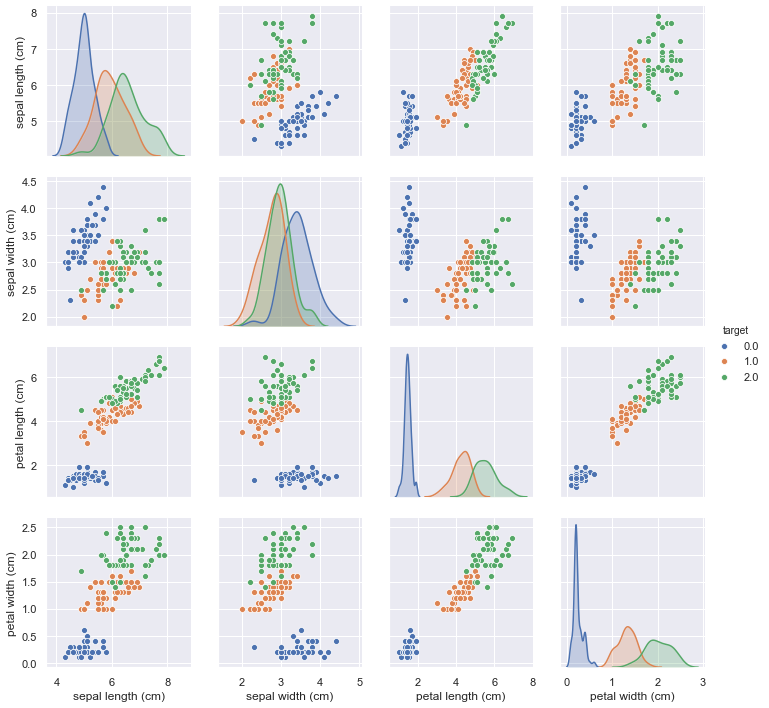

In [46]:
sns.pairplot(irisdf, vars=irisdf.columns[:-1], hue='target')

<div class="optional">

In these scatterplots, the colours represent the species of the flower. We can see that the blue species is clearly separated from the other two. 

In most of these scatter plots, a straight line through the scatter plot could divide the plotted area into a region where the species is 0 (Setosa) and a region where the species is not 0 (i.e. Versicolour or Virginica). 

The species of any new point could then be predicted based on which region the new point falls in. 

Let's consider a method to do that. 

</div>

<div class="optional">

## Logistic regression [$\star$]

We previously used linear regression to produce a model to predict the sepal length of the flowers in the Iris dataset from the other measurements. 

What if instead we want to predict the species of the flower given its measurements, i.e. perform classification? 

We could use regression to model the probability that a given set of measurements belongs to a specific species (say Iris setosa). 

However, the output of linear regression ranges from $-\infty$ to $\infty$. This is not appropriate to model probabilities, which lie between $0$ and $1$. 

</div>

<div class="optional">
    
### Sigmoid functions ... the logistic function [$\star$]

If we had a function that could accept values from $-\infty$ to $\infty$ and compress them to a range between $0$ and $1$, we could apply this function to the result of a linear regression and interpret the output as probabilities. 

A so-called [**sigmoid function**](https://en.wikipedia.org/wiki/Sigmoid_function), which has a characteristic "S" shape, provides this functionality

The [**logistic Function**](https://en.wikipedia.org/wiki/Logistic_function) (recall lecture 1 - cf. the solution to the logistic function) is an example of such a function and (in an unshifted, unscaled and unsquashed form) is given by

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

<img src="images/activation_sigmoid.png" />

Image by [dvgodoy](https://github.com/dvgodoy/dl-visuals)/[CC-BY](https://creativecommons.org/licenses/by/4.0/)

<br>

The plot above shows the sigmoid function in black, and its derivative in red. 
We can see that the $y$-axis is constrained between $0$ and $1$ for all values of $x$. See homework exercise.

</div>

<div class="optional">

### Classification using the logistic function and linear regression [$\star$]

We can now combine the logistic function with linear regression to build a classifier

$$
y = \frac{1}{1+e^{-z}}
$$

where $z$ is the output of a linear regression as follows:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n .
$$

<br>

With that, we have built perhaps the simplest [**neural network**] possible. 
See also <https://stackoverflow.com/questions/59580874/what-is-the-difference-between-logistic-regression-and-single-neuron-perceptron>

<br>

The figure below shows a representation of our model. "b" is the bias $\beta_0$, the weights "w" are our $\beta_1$, $\beta_2$, ... values.

<img src="images/logistic_model.png" />

Image by [dvgodoy](https://github.com/dvgodoy/dl-visuals)/[CC-BY](https://creativecommons.org/licenses/by/4.0/)

<br>

In comparison with the naive Bayes classifier, the logistic regression classifier directly models the posterior probabilities so it does not offer us the opportunity to incorporate any prior belief we might have about the likelihoods of various outcomes. 

On the other hand, the naive Bayes classifier is built on the assumption that the different input variables (also called *features* in machine learning literature), i.e. $x_1$, $x_2$, \ldots, $x_n$ are independently distributed. This assumption is often not true for real data, so logistic regression can perform better in such cases. 

<br>

Let's now try to apply logistic regression to the Iris classification problem from before. 

</div>

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Reduce the problem to a two-class classification problem, 
# for target=0 vs target>0 (1 or 2)
y = [int(x > 0) for x in iris['target']]
X = iris['data']

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

# Instantiating LinearRegression() Model
lr = LogisticRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Making Predictions
pred = lr.predict(X_test)

accuracy_score(y_test, pred)

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

<div class="optional">

We just built a perfect classifier that can distinguish between class 0 (Iris setosa) vs the other classes in the iris dataset. 

However, this is not a complete reproduction of the naive Bayes example, since our naive Bayes classifier could distinguish between all three classes, while this classifier can only distinguish one class from the rest. 

To address this we need to combine the above with two other similar classifiers for the other two classes. 

As an exercise, you could try building these classifiers and report the final accuracy of the three-class classification problem for logistic regression. 

</div>

# Summary

So what have we covered today?

<br>

1. A review of some introductory statistics.

<br>

2. A review of some probability concepts and theory.

<br>

3. In particular, conditional probabilities and Bayes theorem.

<br>

4. A very brief introduction of Monte-Carlo methods.

<br>

5. The use of probabilistic methods as a basis for some simple ML algorithms - including some examples of classification and regression.